# Normalization  

The goal is to bring the values to common scale without disturbing the differences in ranges of values or losing information.

* **MinMaxScaling** (when you know minimum and maximum of data, use this one) **<- Mostly used**
* **MeanNormalization** (can be replaced with Standardization so not much used... u gather the data to center(0,0) same as standardization.)
* **MaxAbsoluteScaling** (use when you have sparse matrix as input: lot of 0's in input. )
* **RobustScaling** (where there are outliers in the data, prefer this one)

### MinMaxScaling
![ytss](assets/MinMaxScaling.png)



Always brings the values between (0,1). That would means after scaling, if its plotted on a scatter plot, everything will be squished between 0->1 on both x and y axis, thats the geometrical intuition... see the ss


## Let's code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("assets/wine_data.csv",header=None,usecols=[0,1,2])

df.columns = ["Class label","Alcohol","Malic acid"]

df.head()
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Malic acid'>

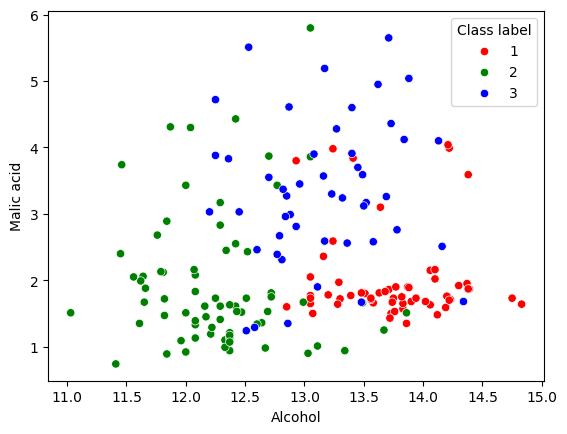

In [48]:
sns.scatterplot(data=df,x="Alcohol",y="Malic acid",hue=df['Class label'],palette={1:"red",2:"green",3:"blue"})

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop("Class label",axis=1),
                                                df["Class label"],
                                                test_size=0.3,
                                                random_state=0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=[X_train.columns])
X_test_scaled = pd.DataFrame(X_test_scaled,columns=[X_test.columns])

In [52]:
np.round(X_train.describe())

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.0
std,1.0,1.0
min,11.0,1.0
25%,12.0,2.0
50%,13.0,2.0
75%,14.0,3.0
max,15.0,6.0


In [53]:
np.round(X_train_scaled.describe())

,Alcohol,Malic acid
count,124.0,124.0
mean,1.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,1.0


**we got what we wanted here**... we wanted to have all the values between 0 to 1... and we can see in both columns... min,max are 0 and 1 respectively... indicating that all the other values automatically lie in this range.

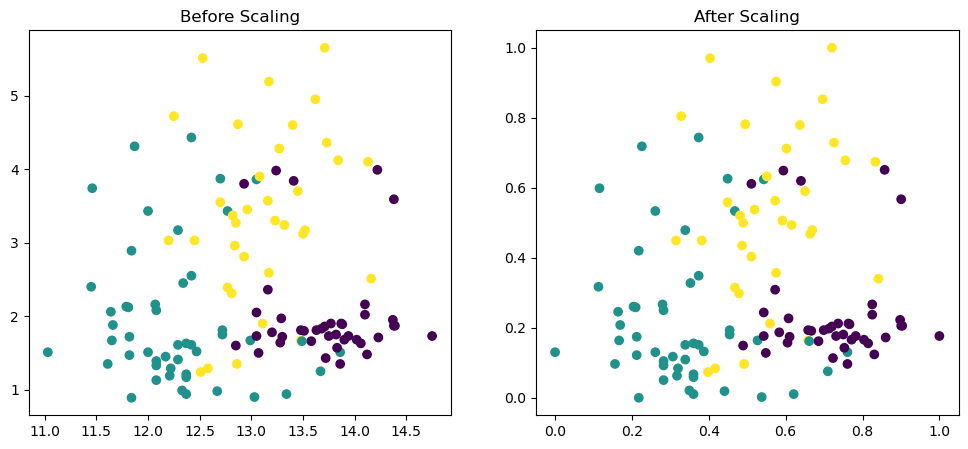

In [54]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scaling")
ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],c=y_train)
ax2.set_title("After Scaling")a
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid'],c=y_train)
plt.show()